In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wavfilescsv/Instruments.csv
/kaggle/input/wavfiles-of-instruments-audio/24Organ.wav
/kaggle/input/wavfiles-of-instruments-audio/14Organ.wav
/kaggle/input/wavfiles-of-instruments-audio/11Snare_Drum.wav
/kaggle/input/wavfiles-of-instruments-audio/9Vintage_lead.wav
/kaggle/input/wavfiles-of-instruments-audio/11Bass.wav
/kaggle/input/wavfiles-of-instruments-audio/28Violins .wav
/kaggle/input/wavfiles-of-instruments-audio/5Violins .wav
/kaggle/input/wavfiles-of-instruments-audio/20Vintage_lead.wav
/kaggle/input/wavfiles-of-instruments-audio/13Violins .wav
/kaggle/input/wavfiles-of-instruments-audio/23Bass.wav
/kaggle/input/wavfiles-of-instruments-audio/2Glockenspiel .wav
/kaggle/input/wavfiles-of-instruments-audio/23Electric_Guitar.wav
/kaggle/input/wavfiles-of-instruments-audio/18Pipa.wav
/kaggle/input/wavfiles-of-instruments-audio/9Glockenspiel .wav
/kaggle/input/wavfiles-of-instruments-audio/13Pipa.wav
/kaggle/input/wavfiles-of-instruments-audio/21String.wav
/kaggle/input/w

In [2]:
from scipy.io import wavfile
import librosa
import tensorflow as tf
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

a = wavfile.read('/kaggle/input/wavfiles-of-instruments-audio/19Organ.wav', 'r')

np.array(a[1],dtype=float)

array([[ 5411.,  3780.],
       [ 5422.,  4202.],
       [ 5428.,  4420.],
       ...,
       [-5278., -2011.],
       [-5238., -1899.],
       [-5167., -1826.]])

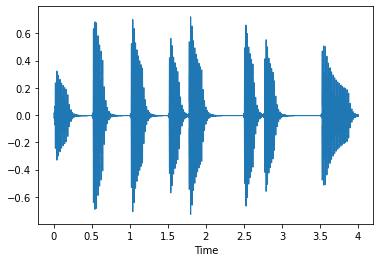

In [3]:
file = ('/kaggle/input/wavfiles-of-instruments-audio/10Bass.wav')

audio_data, sampling_rate = librosa.load(file)
librosa.display.waveshow(audio_data,sr=sampling_rate)
ipd.Audio(file)

In [4]:
audio_data

array([0.01474002, 0.02155965, 0.01832414, ..., 0.00088622, 0.00073085,
       0.00056956], dtype=float32)

In [5]:
sampling_rate

22050

In [6]:
data = pd.read_csv('/kaggle/input/wavfilescsv/Instruments.csv')
data.head()

,File Name,ID,Label
0,10Bass.wav,10,Bass
1,10Electric_Guitar.wav,40,Electric Guitar
2,10Glockenspiel .wav,69,Glockenspiel
3,10Organ.wav,99,Organ
4,10Piano.wav,129,Piano


In [7]:
data['Label'].value_counts()

Bass               30
Glockenspiel       30
Organ              30
Piano              30
Pipa               30
Snare Drum         30
String             30
Vintage_lead       30
Violins            30
Electric Guitar    29
Name: Label, dtype: int64

In [8]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)

### Use a pre-computed log-power Mel spectrogram

In [9]:
Spec = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate, n_mels=128, fmax=8000)

In [10]:
librosa.feature.mfcc(S=librosa.power_to_db(Spec))

array([[-3.7177744e+02, -3.7693790e+02, -4.3359784e+02, ...,
        -5.3613983e+02, -5.4243005e+02, -5.4356677e+02],
       [ 1.4809380e+02,  1.7043744e+02,  1.6181064e+02, ...,
         4.6120560e+01,  3.7345100e+01,  3.5508003e+01],
       [ 4.3298367e+01,  5.9391785e+01,  1.0260874e+02, ...,
         4.5010056e+01,  3.6589546e+01,  3.4099140e+01],
       ...,
       [-5.0950413e+00, -5.0765619e+00, -1.6166129e+00, ...,
        -1.2790474e+00,  7.8197259e-01,  3.3962266e+00],
       [-2.0826116e+00,  1.9628924e-01,  3.6528462e-01, ...,
        -2.4336452e+00, -5.7038701e-01,  2.5589149e+00],
       [-1.7342024e+00, -1.8919691e+00,  8.3251297e-01, ...,
        -3.1902003e+00, -1.6235269e+00,  1.7222371e+00]], dtype=float32)

[Text(0.5, 1.0, 'MFCC')]

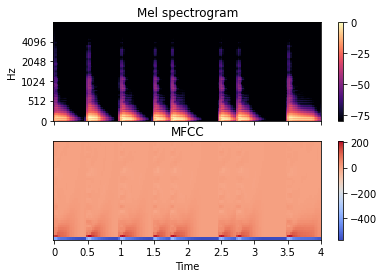

In [11]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(Spec, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [12]:
from tqdm import tqdm

def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [13]:
audio_dataset_path = "/kaggle/input/wavfiles-of-instruments-audio/"

extracted_features=[]
for index_num,row in tqdm(data.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["File Name"]))
    final_class_labels=row["Label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

299it [00:42,  7.06it/s]


In [14]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head(10)

,feature,label
0,"[-511.50357, 75.48788, 53.32773, 42.952393, 36...",Bass
1,"[-78.36852, 60.046062, -72.0162, 82.556564, -3...",Electric Guitar
2,"[-389.19147, 4.8527102, -63.591232, -20.355135...",Glockenspiel
3,"[-356.2252, 151.30482, -27.817781, 33.297714, ...",Organ
4,"[-200.11719, 133.2237, -26.882654, 18.5813, -1...",Piano
5,"[-346.51187, 66.98712, -72.462105, -37.366264,...",Pipa
6,"[-412.81476, -2.1290507, 9.334638, 20.169693, ...",Snare Drum
7,"[-228.16312, 63.78731, -70.19236, 27.790741, -...",String
8,"[-151.05887, 88.40188, -70.88964, 20.531834, -...",Vintage_lead
9,"[-438.0751, 49.33053, -75.92748, -18.270384, -...",Violins


In [15]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['label'].tolist())

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [19]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(10))
model.add(Activation('softmax'))

2022-12-13 10:28:14.527745: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

2022-12-13 10:28:14.904245: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
8/8 [==============================] - 1s 39ms/step - loss: 70.9531 - accuracy: 0.1172 - val_loss: 10.2399 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 10.23988, saving model to saved_models/audio_classification.hdf5
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 47.5068 - accuracy: 0.1464 - val_loss: 8.4028 - val_accuracy: 0.1333

Epoch 00002: val_loss improved from 10.23988 to 8.40276, saving model to saved_models/audio_classification.hdf5
Epoch 3/200
8/8 [==============================] - 0s 16ms/step - loss: 37.5673 - accuracy: 0.1088 - val_loss: 5.0621 - val_accuracy: 0.1833

Epoch 00003: val_loss improved from 8.40276 to 5.06210, saving model to saved_models/audio_classification.hdf5
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 30.4362 - accuracy: 0.1464 - val_loss: 3.4126 - val_accuracy: 0.2333

Epoch 00004: val_loss improved from 5.06210 to 3.41262, saving model to saved_models/audio_classificat

In [22]:
filename="/kaggle/input/wavfiles-of-instruments-audio/11Violins .wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-3.3758862e+02  1.1471141e+02 -6.6975380e+01 -7.5155725e+00
 -4.6315662e+01 -3.7283264e+01 -3.8392277e+01 -2.8409431e+01
 -1.9979622e+01 -1.0637436e+01 -9.3495970e+00 -5.5835342e+00
 -1.1987010e+01 -1.3694923e+01 -1.3766242e+01 -7.4650846e+00
 -4.4414954e+00 -4.5517811e-01  1.1067457e+00 -1.1589128e+00
 -4.4347997e+00  4.7757593e-01  6.6813202e+00  5.4072447e+00
  6.2197056e+00  6.7424064e+00  1.1537919e+00  3.4136343e+00
  6.0562806e+00 -1.6827546e+00 -2.2697942e-01  6.0285311e+00
  3.0164089e+00 -8.5195464e-01 -3.9002374e-01 -3.9249182e+00
 -2.0254459e+00  9.1272998e-01 -3.3947747e+00 -6.1482859e+00]
[[-3.3758862e+02  1.1471141e+02 -6.6975380e+01 -7.5155725e+00
  -4.6315662e+01 -3.7283264e+01 -3.8392277e+01 -2.8409431e+01
  -1.9979622e+01 -1.0637436e+01 -9.3495970e+00 -5.5835342e+00
  -1.1987010e+01 -1.3694923e+01 -1.3766242e+01 -7.4650846e+00
  -4.4414954e+00 -4.5517811e-01  1.1067457e+00 -1.1589128e+00
  -4.4347997e+00  4.7757593e-01  6.6813202e+00  5.4072447e+00
   6.2197056e+00 

array(['String'], dtype='<U15')